In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

##1.讀入Fashion MNIST 數據集

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

##2.欣賞數據集內容

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Bag


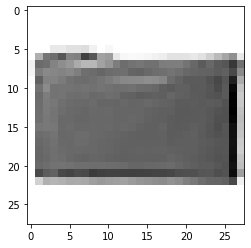

In [5]:
n = 1234
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

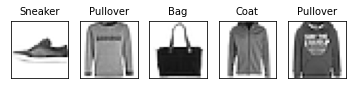

In [6]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]],fontsize =10)
    plt.imshow(x_train[n], cmap='Greys')

##3.開始打造神經網路

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [9]:
x_train.shape #檢測資料型態

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(60000, 28, 28, 1)/255 #色彩範圍為0到255所以要除於255
x_test  = x_test.reshape(10000, 28, 28, 1)/255

In [11]:
x_train[50].shape

(28, 28, 1)

In [12]:
y_train[50]

3

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten
from tensorflow.keras.optimizers import SGD

In [0]:
model = Sequential()

activation = relu

*  convolution 1: 10 filters(5x5)，max_pooling:2x2
*  convolution 2: 20 filters(5x5)，max_pooling:2x2
*  convolution 3: 40 filters(5x5)，max_pooling:2x2
*  layer: 80 neurons
*  output layer: 10 neurons

In [0]:
model.add(Conv2D(10, (5,5), padding='same',input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(20,(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(40, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(80, activation='relu'))
model.add(Dense(10, activation='softmax'))

##4.組裝神經網路

loss function 改成 HuberLoss

learning rate 改成0.716

In [0]:
model.compile(loss='huber_loss', optimizer=SGD(lr=0.716), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        260       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 20)        5020      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 20)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 40)          20040     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 40)          0         
_________________________________________________________________
flatten (Flatten)            (None, 360)               0

In [26]:
#convolution 1的參數
(5*5+1)*10

260

In [27]:
#convolution 2的參數
(5*5*10+1)*20

5020

In [28]:
#convolution 3的參數
(5*5*20+1)*40

20040

學習率和訓練次數做更動

In [29]:
model.fit(x_train, y_train,batch_size=150, epochs=10)

Epoch 1/10
400/400 [==============================] - 63s 157ms/step - loss: 0.0224 - accuracy: 0.6839
Epoch 2/10
400/400 [==============================] - 60s 149ms/step - loss: 0.0157 - accuracy: 0.7785
Epoch 3/10
400/400 [==============================] - 59s 146ms/step - loss: 0.0137 - accuracy: 0.8077
Epoch 4/10
400/400 [==============================] - 59s 147ms/step - loss: 0.0124 - accuracy: 0.8265
Epoch 5/10
400/400 [==============================] - 59s 147ms/step - loss: 0.0115 - accuracy: 0.8401
Epoch 6/10
400/400 [==============================] - 59s 146ms/step - loss: 0.0108 - accuracy: 0.8500
Epoch 7/10
400/400 [==============================] - 59s 147ms/step - loss: 0.0102 - accuracy: 0.8591
Epoch 8/10
400/400 [==============================] - 59s 147ms/step - loss: 0.0098 - accuracy: 0.8644
Epoch 9/10
400/400 [==============================] - 59s 147ms/step - loss: 0.0095 - accuracy: 0.8696
Epoch 10/10
400/400 [==============================] - 59s 147ms/step - l

In [0]:
result = model.predict_classes(x_test)

##5.訓練成果

In [0]:
def my_predict(n):
  print('我的CNN預測是',class_names[result[n]])
  X = x_test[n].reshape(28,28)
  plt.imshow(X, cmap='Greys')

我的CNN預測是 Shirt


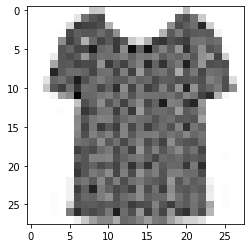

In [49]:
my_predict(1000)

In [0]:
from ipywidgets import interact_manual

In [50]:
interact_manual(my_predict, n=(0,9999));

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

In [51]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.0096 - accuracy: 0.8692


In [52]:
loss, acc =score
print('測試資料正確率為', acc)

測試資料正確率為 0.8691999912261963


##6.補充

原本的filter個數分別為32,64,128，但是試了之後發現要跑有點時間，於是改成現在的樣子。